<a href="https://colab.research.google.com/github/paramesh137/Data-Analytics/blob/main/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-d7a742eda407>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='1/1/2024', freq='H')


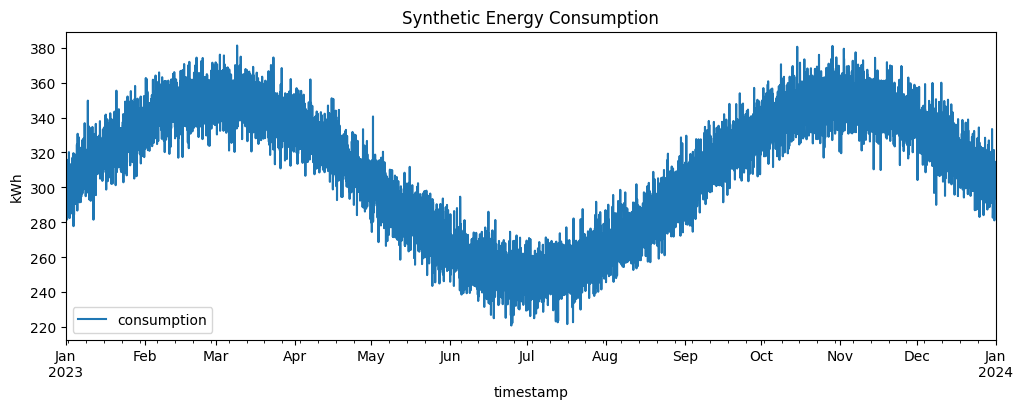

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0647 - val_loss: 0.0054
Epoch 2/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0044 - val_loss: 0.0053
Epoch 3/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 4/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 5/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0042 - val_loss: 0.0052
Epoch 6/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 7/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 8/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0042 - val_loss: 0.0052
Epoch 9/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 10/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0043 - val_loss: 0.0053
Epoch 11/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 12/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/ste

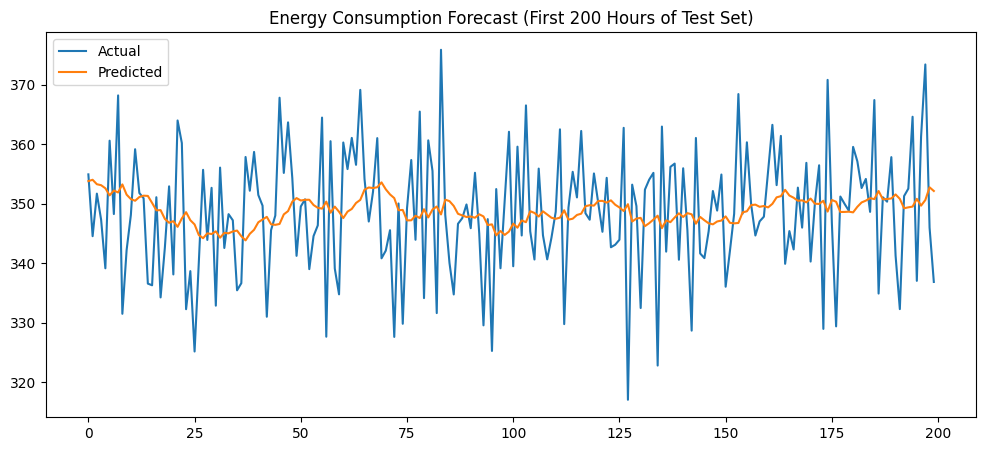

In [2]:
# Step 1: Install Required Libraries
!pip install -q matplotlib pandas scikit-learn tensorflow

# Step 2: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 3: Generate Synthetic Hourly Energy Consumption Data (1 year)
np.random.seed(42)
date_rng = pd.date_range(start='1/1/2023', end='1/1/2024', freq='H')
consumption = 300 + 50 * np.sin(np.linspace(0, 3 * np.pi, len(date_rng))) + np.random.normal(0, 10, len(date_rng))
df = pd.DataFrame(data={'timestamp': date_rng, 'consumption': consumption})
df.set_index('timestamp', inplace=True)

# Step 4: Plot the data
df.plot(figsize=(12, 4), title="Synthetic Energy Consumption")
plt.ylabel("kWh")
plt.show()

# Step 5: Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Step 6: Create dataset for LSTM
def create_dataset(data, time_steps=24):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 24  # use last 24 hours to predict the next hour
X, y = create_dataset(data_scaled, time_steps)

# Step 7: Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 8: Build the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Step 10: Make predictions
y_pred = model.predict(X_test)

# Step 11: Inverse scale predictions
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Step 12: Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[:200], label='Actual')
plt.plot(y_pred_inv[:200], label='Predicted')
plt.title("Energy Consumption Forecast (First 200 Hours of Test Set)")
plt.legend()
plt.show()
